In [1]:
setwd("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/Drug_repurposing/results/in_vitro_induction")

In [2]:
library(pheatmap)
library(RColorBrewer)
library(randomcoloR)
library(tidyverse)
library(reshape2)
library(umap)
library(dplyr)
custom.config <- umap.defaults
custom.config$random_state <- 123

Warning message:
"package 'randomcoloR' was built under R version 4.2.2"
Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conf

In [3]:
data<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/MEA_data/ready/Well_summary_parameters_NB_drugs_48_96wpt_and_mutants.csv")
data<-data[-1]
rownames(data)<-data$Unique_ID
data$NB_rate<-data$hf_and_NB_rate - data$hfNB_rate
#Remove the column 'column_name'
data <- data %>% select(-hf_and_NB_rate)
data$Identidy<-ifelse(data$Phenotype=="DMSO","Drug_C",data$Identidy)
data$Own_control<-ifelse(data$Phenotype=="DMSO","WTC",data$Own_control)
data$Own_control<-ifelse(data$Identidy=="Drug","WTC",data$Own_control)

final_selected_variables<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/DIV28/final_selected_variables_001_top4.csv")
final_selected_variables<-final_selected_variables$x
data_meta<-data %>%  select(where(is.factor) | where(is.character))

data<- merge(data[final_selected_variables], data_meta, by = 0)

In [4]:
drugs_info<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/MEA_data/drugs_colors.csv")
data$Phenotype<-factor(data$Phenotype,levels=drugs_info$Phenotype)
desired_batch<-c('109-4916','109-4955','110-5711','97-0505')
data<-data[data$batch %in% desired_batch,]

color_Phenotype<-drugs_info$Color_v3

names(color_Phenotype)<-drugs_info$Phenotype
#ADNP, YY1 and WTC measeq!
data <- mutate(data, MEAseq_wells = ifelse(batch == "97-0505" & Well_Label %in% c("A1","C1","A2", #WTC
                                                                                  "A5","A6","B6", #YY1
                                                                                  "C3","C4","B4"), #adnp
                                           "yes", "no"))

In [5]:
exclude_noMEAseq<-data[data$Phenotype %in% c("ADNP_CR","YY1_CR") & data$MEAseq_wells=="no",]
exclude_WTCnoMEAseq<-data[data$Phenotype %in% c("WTC") & data$batch == "97-0505" & data$MEAseq_wells=="no",]

In [6]:
data_measeq<-data[!rownames(data) %in% rownames(exclude_noMEAseq),]
data_measeq<-data_measeq[!rownames(data_measeq) %in% rownames(exclude_WTCnoMEAseq),]

In [7]:
#ALSO EXCLUDE A3, A4, A5, from 109-4955!! bad cultures
exclude_bad_WTC <- data_measeq[data_measeq$batch=="109-4955" & data_measeq$Well_Label %in% c("A3","A4","A5"),]

In [8]:
data_measeq<-data_measeq[!rownames(data_measeq) %in% rownames(exclude_bad_WTC),]
data_measeq<-droplevels(data_measeq)
data_measeq[data_measeq$batch=="109-4955" & data_measeq$Well_Label %in% c("A3","A4","A5"),]

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


Row.names INBI IEBI_CV EB_prop INBI_Std EB_rate_Std EB_ISI Firing_rate_Hz
     NB_rate Spikes_per_EB_Std ⋯ Own_control isogenic Pool_Kleefstra
     Pool_WTC_CHD2 Pool_CACNA1A Pool_SMARCB1 Pool_ARID1B_2_rescue Unique_ID
     PT_all_path_Well_Label MEAseq_wells

In [9]:
colnames(data_measeq)
head(data_measeq$PT_all_path_Well_Label)

[1] "Row.names"              "INBI"                   "IEBI_CV"               
 [4] "EB_prop"                "INBI_Std"               "EB_rate_Std"           
 [7] "EB_ISI"                 "Firing_rate_Hz"         "NB_rate"               
[10] "Spikes_per_EB_Std"      "EB_rate_Hz"             "EB_Dur"                
[13] "EB_prop_Std"            "NB_dur"                 "Spikes_per_EB"         
[16] "EB_Dur_Std"             "Firing_Rate_in_NB_Hz"   "IEBI"                  
[19] "IEBI_Std"               "NB_prop"                "hfNB_and_NB_prop"      
[22] "hfNB_rate"              "Well_Label"             "Phenotype"             
[25] "batch"                  "cell_line_batch"        "machine"               
[28] "PT_all_path"            "DIV_range"              "Syndrome"              
[31] "Gene"                   "Identidy"               "Own_control"           
[34] "isogenic"               "Pool_Kleefstra"         "Pool_WTC_CHD2"         
[37] "Pool_CACNA1A"           "Pool_SMARCB1"           "Pool_ARID1B_2_rescue"  
[40] "Unique_ID"              "PT_all_path_Well_Label" "MEAseq_wells"

[1] "D:/2024/Patient_Paper/PT_all/Developmental/DIV28/WTC_ADNP_YY1_CHD8_EHMT1/97-0505_A1"
[2] "D:/2024/Patient_Paper/PT_all/Developmental/DIV28/WTC_ADNP_YY1_CHD8_EHMT1/97-0505_A2"
[3] "D:/2024/Patient_Paper/PT_all/Developmental/DIV28/WTC_ADNP_YY1_CHD8_EHMT1/97-0505_A5"
[4] "D:/2024/Patient_Paper/PT_all/Developmental/DIV28/WTC_ADNP_YY1_CHD8_EHMT1/97-0505_A6"
[5] "D:/2024/Patient_Paper/PT_all/Developmental/DIV28/WTC_ADNP_YY1_CHD8_EHMT1/97-0505_B4"
[6] "D:/2024/Patient_Paper/PT_all/Developmental/DIV28/WTC_ADNP_YY1_CHD8_EHMT1/97-0505_B6"

In [10]:
length(unique(data_measeq$PT_all_path_Well_Label))

[1] 1037

In [11]:
colnames(data_measeq)
levels(factor(data_measeq$batch))

[1] "Row.names"              "INBI"                   "IEBI_CV"               
 [4] "EB_prop"                "INBI_Std"               "EB_rate_Std"           
 [7] "EB_ISI"                 "Firing_rate_Hz"         "NB_rate"               
[10] "Spikes_per_EB_Std"      "EB_rate_Hz"             "EB_Dur"                
[13] "EB_prop_Std"            "NB_dur"                 "Spikes_per_EB"         
[16] "EB_Dur_Std"             "Firing_Rate_in_NB_Hz"   "IEBI"                  
[19] "IEBI_Std"               "NB_prop"                "hfNB_and_NB_prop"      
[22] "hfNB_rate"              "Well_Label"             "Phenotype"             
[25] "batch"                  "cell_line_batch"        "machine"               
[28] "PT_all_path"            "DIV_range"              "Syndrome"              
[31] "Gene"                   "Identidy"               "Own_control"           
[34] "isogenic"               "Pool_Kleefstra"         "Pool_WTC_CHD2"         
[37] "Pool_CACNA1A"           "Pool_SMARCB1"           "Pool_ARID1B_2_rescue"  
[40] "Unique_ID"              "PT_all_path_Well_Label" "MEAseq_wells"

[1] "109-4916" "109-4955" "110-5711" "97-0505"

In [12]:
data_measeq %>%
  filter(DIV_range == "DIV31") %>%
  group_by(Phenotype) %>%
  summarise(n_replicates = n())

Phenotype             n_replicates
1  DMSO                   8          
2  WTC                   21          
3  Clopidogrel[1µM]       8          
4  Clopidogrel[10µM]      8          
5  Devazepide[2.5µM]      8          
6  Devazepide[5µM]        8          
7  Triciribine[0.5µM]     8          
8  Triciribine[1µM]       8          
9  Clofibricacid[5nM]     8          
10 Clofibricacid[10nM]    8          
11 EpothiloneB[5nM]       8          
12 EpothiloneB[10nM]      8          
13 Flubendazol[0.5µM]     7          
14 Flubendazol[1µM]       7          
15 CytochalastinD[1µM]    7          
16 CytochalastinD[2.5µM]  7          
17 AZD-2014[50nM]         8          
18 AZD-2014[100nM]        8          
19 Coluracetam[5µM]       8          
20 Coluracetam[10µM]      8

In [13]:
controls<-data_measeq[data_measeq$Identidy=="Control",]
treatment<-data_measeq[!rownames(data_measeq) %in% rownames(controls),]
controls<-droplevels(controls)
treatment<-droplevels(treatment)

In [14]:
controls <- controls %>%
  mutate(across(where(is.character), ~ na_if(.,"")))

In [16]:
levels(factor(controls$Phenotype))

[1] "WTC"

In [13]:
numeric_var<-names(controls)[sapply(controls, is.numeric)]
median_controls<-controls %>% group_by(batch,DIV_range)   %>% 
             summarise_at(numeric_var, median) %>% as.data.frame()#median
median_controls$DIV_batch<-paste0(median_controls$DIV_range,"_",median_controls$batch)
rownames(median_controls)<-median_controls$DIV_batch
median_controls <- median_controls[complete.cases(median_controls), ]

treatment$DIV_batch<-paste0(treatment$DIV_range,"_",treatment$batch)
treatment_DIV_batch<-split(treatment,f=treatment$DIV_batch)

In [15]:
treatment_DIV_batch_norm<-list()
for(DIV_batch in names(treatment_DIV_batch)){
    df<-treatment_DIV_batch[[DIV_batch]] #here sumamrizing per div batch at ach phenotype, so one data point epr batch and then normalize 
    median_per_val<-df %>% group_by(Phenotype)   %>% 
             summarise_at(numeric_var, median) %>% as.data.frame() #median
    median_per_val$DIV_batch<-DIV_batch
    batch<-unique(df$batch)
    DIV_range<-unique(df$DIV_range)
    median_per_val$batch<-batch
    median_per_val$DIV_range<-DIV_range
    norm_row<-median_controls[rownames(median_controls) == DIV_batch,numeric_var]
    for( r in 1:dim(median_per_val)[1]){
        median_per_val[r,numeric_var]<-median_per_val[r,numeric_var]-norm_row
    }
    treatment_DIV_batch_norm[[DIV_batch]]<-median_per_val
   
}
treatment_DIV_batch_norm<-do.call(rbind,treatment_DIV_batch_norm)
treatment_DIV_batch_norm$Unique_ID<-paste0(treatment_DIV_batch_norm$Phenotype,"_",treatment_DIV_batch_norm$DIV_batch)
rownames(treatment_DIV_batch_norm)<-treatment_DIV_batch_norm$Unique_ID

In [16]:
#now select the drugs and plut shred all 
keep<-c('DMSO',     
        'EpothiloneB[5nM]','EpothiloneB[10nM]',
        'CytochalastinD[1µM]','CytochalastinD[2.5µM]',
       'ADNP_CR','YY1_CR')


In [17]:
cell_lines_v2<-treatment_DIV_batch_norm[treatment_DIV_batch_norm$Phenotype %in% keep,]

cell_lines_v2<-cell_lines_v2 %>% group_by(Phenotype,DIV_range)   %>% 
             summarise_at(numeric_var, median) %>% as.data.frame()
cell_lines_v2$Phenotype_DIV_range<-paste0(cell_lines_v2$Phenotype,"_",cell_lines_v2$DIV_range)
rownames(cell_lines_v2)<-cell_lines_v2$Phenotype_DIV_range

cell_lines_noMeta <- cell_lines_v2 %>% dplyr::select(where(is.numeric))

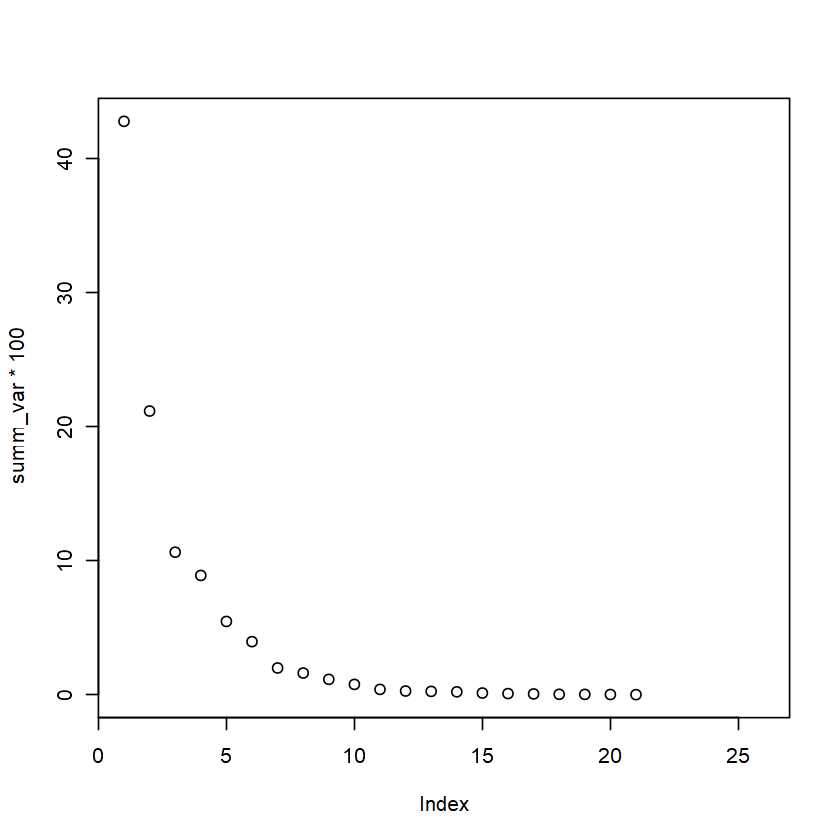

In [18]:
pca_meta_all_samples <- cell_lines_v2 %>%
 select(where(is.character) | where(is.factor))
set.seed(1)
pca_meta_all_samples$Unique_ID<-rownames(pca_meta_all_samples)
pca_fit_all_samples <- cell_lines_noMeta 
  
pca_fit_all_samples<- prcomp(pca_fit_all_samples, center = TRUE,scale. = TRUE)
pca_fit_all_samples$rotation <- -1*pca_fit_all_samples$rotation
summ <- summary(pca_fit_all_samples)
summ_var<-summ$importance[2,]
summ_var<-unname(summ_var[1:26])
plot(summ_var*100)

In [19]:
# Extract the loadings (rotation matrix)
loadings <- pca_fit_all_samples$rotation
# Extract the proportion of variance explained by each component
explained_variance <- pca_fit_all_samples$sdev^2 / sum(pca_fit_all_samples$sdev^2)

setNames(explained_variance, seq_along(explained_variance))

1            2            3            4            5            6 
4.280826e-01 2.117850e-01 1.063996e-01 8.906089e-02 5.470059e-02 3.962828e-02 
           7            8            9           10           11           12 
1.997144e-02 1.620489e-02 1.149168e-02 7.712227e-03 3.981217e-03 2.771041e-03 
          13           14           15           16           17           18 
2.485538e-03 2.171450e-03 1.268889e-03 8.486866e-04 6.092254e-04 3.436308e-04 
          19           20           21 
2.574259e-04 1.802752e-04 4.541563e-05

In [20]:
pca_pc_metrics<-as.data.frame(pca_fit_all_samples$x)
pca_pc_metrics$Unique_ID<-rownames(pca_pc_metrics)
pca_pc_metrics<-inner_join(pca_pc_metrics,pca_meta_all_samples, by="Unique_ID")
rownames(pca_pc_metrics)<-pca_pc_metrics$Unique_ID
var_explained =round((pca_fit_all_samples$sdev^2 / sum(pca_fit_all_samples$sdev^2))*100,2)
pca_pc_metrics$Phenotype<-factor(pca_pc_metrics$Phenotype,levels=drugs_info$Phenotype)
pca_pc_metrics<-droplevels(pca_pc_metrics)

In [21]:
colors_batch<-c("white","white","white","white")
names(colors_batch)<-levels(factor(pca_pc_metrics$batch))

In [22]:
pca_meta_all_samples <- pca_meta_all_samples %>%
  mutate(dose = str_extract(Phenotype, "\\[(.*?)\\]") %>% 
           replace_na(""))

pca_meta_all_samples$Phenotype_DIV_range	

[1] "DMSO_DIV28"                  "DMSO_DIV31"                 
 [3] "DMSO_DIV35"                  "DMSO_DIV37"                 
 [5] "DMSO_DIV42"                  "DMSO_DIV44"                 
 [7] "DMSO_DIV49"                  "EpothiloneB[5nM]_DIV28"     
 [9] "EpothiloneB[5nM]_DIV31"      "EpothiloneB[5nM]_DIV35"     
[11] "EpothiloneB[5nM]_DIV37"      "EpothiloneB[5nM]_DIV42"     
[13] "EpothiloneB[5nM]_DIV44"      "EpothiloneB[5nM]_DIV49"     
[15] "EpothiloneB[10nM]_DIV28"     "EpothiloneB[10nM]_DIV31"    
[17] "EpothiloneB[10nM]_DIV35"     "EpothiloneB[10nM]_DIV37"    
[19] "EpothiloneB[10nM]_DIV42"     "EpothiloneB[10nM]_DIV44"    
[21] "EpothiloneB[10nM]_DIV49"     "ADNP_CR_DIV28"              
[23] "ADNP_CR_DIV35"               "ADNP_CR_DIV42"              
[25] "ADNP_CR_DIV49"               "CytochalastinD[1µM]_DIV28"  
[27] "CytochalastinD[1µM]_DIV31"   "CytochalastinD[1µM]_DIV35"  
[29] "CytochalastinD[1µM]_DIV37"   "CytochalastinD[1µM]_DIV42"  
[31] "CytochalastinD[1µM]_DIV44"   "CytochalastinD[2.5µM]_DIV28"
[33] "CytochalastinD[2.5µM]_DIV31" "CytochalastinD[2.5µM]_DIV35"
[35] "CytochalastinD[2.5µM]_DIV37" "YY1_CR_DIV28"               
[37] "YY1_CR_DIV35"                "YY1_CR_DIV42"               
[39] "YY1_CR_DIV49"

In [23]:
pca_pc_metrics$DIV_range <- gsub("DIV", "Day", pca_pc_metrics$DIV_range)
pca_meta_all_samples$DIV_range <- gsub("DIV", "Day", pca_meta_all_samples$DIV_range)
pca_meta_all_samples$label<-paste0(pca_meta_all_samples$DIV_range,pca_meta_all_samples$dose)
pca_pc_metrics$label<-pca_meta_all_samples$label

In [24]:
color_Phenotype<-drugs_info$Color_v3
names(color_Phenotype)<-drugs_info$Phenotype

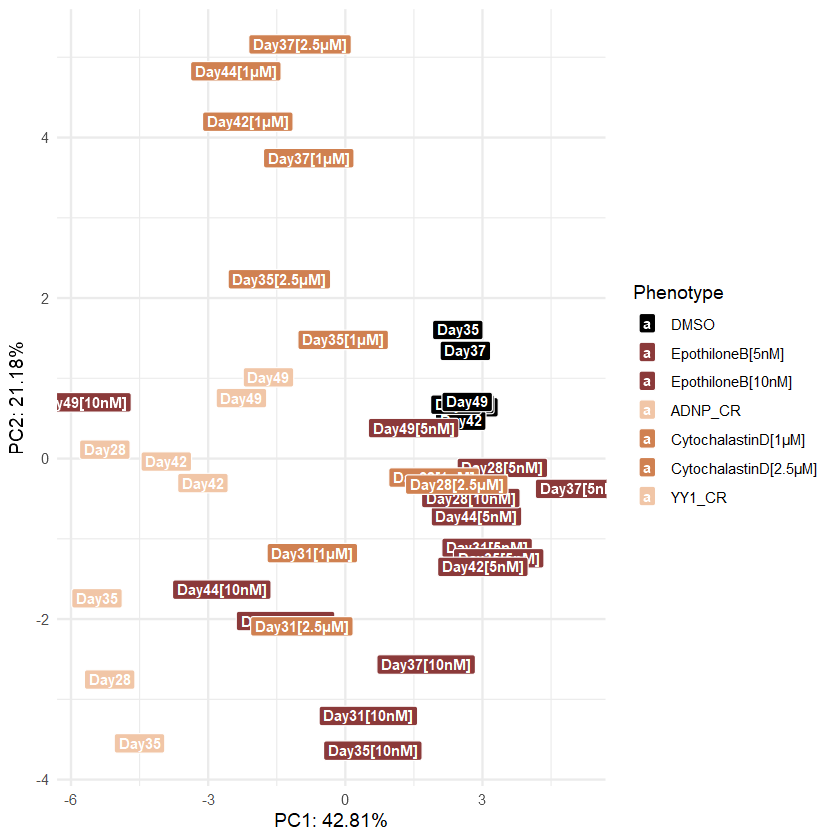

In [25]:
p<-ggplot(pca_pc_metrics, aes(PC1, PC2, fill=Phenotype)) +
  geom_point(size=3,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") +   scale_fill_manual(values=color_Phenotype)+
           theme_minimal()+ 
       geom_label(aes(label = label), fontface="bold", color = "white",size=3)+#+ scale_color_manual(values=colors_batch)
      
  xlab(paste0("PC1: ",var_explained[1],"%")) +
  ylab(paste0("PC2: ",var_explained[2],"%"))
p
# tiff('PCA_treatment.tiff', res =300, units = "in", width = 5.3, height = 5)
# p
# dev.off()

ggsave("PCA_treatment.pdf",bg = "transparent",
                  width = 5.3,   # inches
                  height = 5,
                   plot=p# inches
)

In [26]:
library(proxy)

calculate_pairwise_distance <- function(group_1, group_2, umap_df) {
  # Subset the UMAP coordinates
  umap_1 <- umap_df[umap_df$Phenotype_DIV_range == group_1, c("UMAP1", "UMAP2")]
  umap_2 <- umap_df[umap_df$Phenotype_DIV_range == group_2, c("UMAP1", "UMAP2")]

  # Return NA if either group is empty or contains non-finite values
  if (nrow(umap_1) < 1 || nrow(umap_2) < 1 ||
      any(!is.finite(as.matrix(umap_1))) || any(!is.finite(as.matrix(umap_2)))) {
    return(NA_real_)
  }

  # Return 0 for self-comparison
  if (group_1 == group_2) {
    return(0)
  }

  # Compute cosine distances
  combined <- rbind(umap_1, umap_2)
  dist_matrix <- as.matrix(proxy::dist(combined, method = "cosine"))

  # Subset distances between group_1 and group_2
  rows_1 <- 1:nrow(umap_1)
  cols_2 <- (nrow(umap_1) + 1):nrow(combined)
  sub_matrix <- dist_matrix[rows_1, cols_2, drop = FALSE]

  # Return average distance
  return(mean(sub_matrix, na.rm = TRUE))
}



Attaching package: 'proxy'


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix




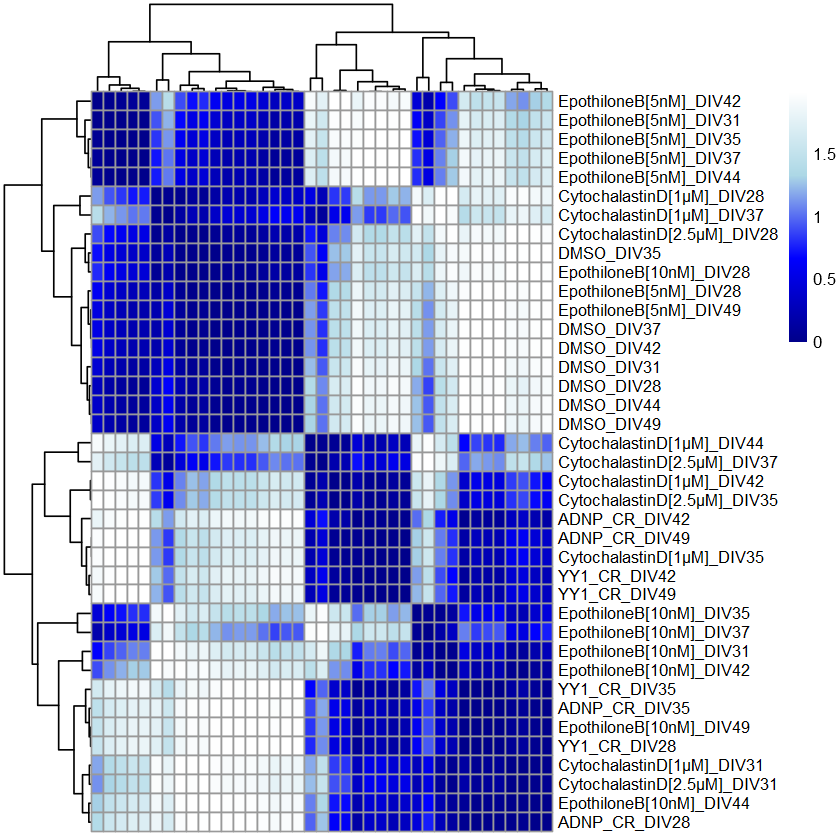

In [27]:
for (n in c(11)){    
    n.components=n
    pca_pc_metrics_all_samples<-pca_pc_metrics[,1:n.components]
   
    
    umap_meta <- pca_pc_metrics_all_samples %>%  select(where(is.factor) | where(is.character))
    umap_fit<-pca_pc_metrics_all_samples %>%
              select(where(is.numeric))  %>%
              umap(config=custom.config)
    umap_df <- umap_fit$layout %>%
      as.data.frame()
    colnames(umap_df)<-c("UMAP1","UMAP2")
    umap_df$Unique_ID<-rownames(umap_df)
    umap_df<-inner_join(umap_df,pca_meta_all_samples, by="Unique_ID")
    umap_df$Phenotype<-factor(umap_df$Phenotype,levels=drugs_info$Phenotype)
    rownames(umap_df)<-umap_df$line_DIV_machine
    

     p<-ggplot(umap_df, aes(UMAP1, UMAP2,  fill=Phenotype)) +
    geom_point(size=3,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "white") + scale_fill_manual(values=color_Phenotype)+
           theme_minimal()+ 
       geom_label(aes(label = label), fontface="bold", color = "white",size=3)#+ scale_color_manual(values=colors_batch)

 
    
    ggsave(paste0("UMAP_PCA",n.components,"lab_v3.pdf"),
                  width =7,   # inches
                  height = 4,
                   plot=p# inches
   
        )
    unique_cell_lines <- unique(umap_df$Phenotype_DIV_range)
    pairwise_distances_matrix <- matrix(NA, nrow = length(unique_cell_lines), ncol = length(unique_cell_lines))
    rownames(pairwise_distances_matrix) <- unique_cell_lines
    colnames(pairwise_distances_matrix) <- unique_cell_lines
    # Loop through all pairs of cell lines and calculate the pairwise distance
    for (i in 1:(length(unique_cell_lines) - 1)) {
        for (j in (i + 1):length(unique_cell_lines)) {
            cell_line_i <- unique_cell_lines[i]
            cell_line_j <- unique_cell_lines[j]
            
            # Calculate the distance between the pair of cell lines
            pairwise_distances_matrix[i, j] <- calculate_pairwise_distance(cell_line_i, cell_line_j, umap_df)
            pairwise_distances_matrix[j, i] <- pairwise_distances_matrix[i, j]  # Symmetric distance
        }
    }
        # Replace the diagonal (self-distances) with zero directly
    diag(pairwise_distances_matrix) <- 0

    # Plot heatmap for pairwise distances between cell lines
    #colors <- colorRampPalette(brewer.pal(9, "YlGnBu"))(255)  # Yellow-Green-Blue
    colors <- colorRampPalette(c( "darkblue","blue","lightblue","white"  ))(250)

    
    p <- pheatmap(pairwise_distances_matrix,
                  col = colors,
                  show_colnames = FALSE,  # Hide x-axis labels
              show_rownames = TRUE,   # Keep y-axis labels
                  #breaks = seq(0, 2, length.out = 256),
                  angle_col = 90)

 

    ggsave(paste0("UMAP_distance_PC",n.components,".pdf"),bg = "transparent",
                  width = 7,   # inches
                  height = 6,   # inches
                plot=p
        )
    
    #add now summarized 

    
    }

In [ ]:
getwd()